## Water Usage For Agriculture Prediction System


#### Life cycle of this Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project analyzes how irrigation needs are influenced by various factors such as temperature, humidity, soil moisture, and rainfall patterns.

### 2) Data Collection
- Dataset Source - large_irrigation_data_morocco.csv
- The data consists of 20 columns capturing environmental and climatic variables related to irrigation.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [193]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [194]:
#chargement de données dans un dataframe à l'aide de library pandas (voyez qu'on utilise pd comme alias de pandas)
df = pd.read_csv('data/morocco_irrigation_dataset.csv')

#### Show Top 5 Records

In [195]:
df.head()

,Region,Humidity (%),Soil Type,Temperature (°C),Terrain Type,Rainfall (mm),Wind Speed (km/h),Sunlight Hours,Water Availability,Crop Type,...,Evapotranspiration (mm/day),Irrigation Frequency (days),Rainfall Forecast (mm),Vegetation Index,Topography,Water Absorption Capacity,Irrigation System Type,Distance to Water Source (km),Recommended Irrigation Level,Daily Irrigation Water (m³)
0,Rabat-Salé-Kénitra,75.121776,Silty,23.077429,Coastal Plain,120.274424,21.084686,11.803914,Medium,Tomatoes,...,2.520540,11,54.811969,0.251444,Steep Slope,Low,Sprinkler,41.685110,Medium,7.445686
1,Casablanca-Settat,75.357847,Silty,21.651923,Valley,137.012347,5.476830,5.996093,Low,Dates,...,3.860997,14,92.406643,0.759249,Steep Slope,High,Surface,1.789972,High,5.071238
2,Oriental,80.342727,Clay,16.165387,Mountain,460.368968,12.377214,11.238763,Medium,Almonds,...,2.589987,10,190.711186,0.185675,Steep Slope,High,Sprinkler,43.629030,Medium,10.020392
3,Rabat-Salé-Kénitra,53.233556,Loam,31.254333,Coastal Plain,38.369757,44.121060,7.300967,Low,Wheat,...,3.239376,11,113.790218,0.822571,Flat,Medium,Drip,11.430443,Low,8.167838
4,Fes-Meknes,72.812419,Loam,26.681846,Mountain,304.780411,18.042496,5.088597,High,Citrus,...,3.749167,6,139.214525,0.580907,Steep Slope,High,Sprinkler,24.826982,Low,12.000000


#### Shape of the dataset

In [196]:
df.shape

(5000, 21)

### 2.2 Dataset information

### 3) Dataset Information
- temperature : Temperature levels affecting irrigation
- humidity : Humidity levels in the region
- soil_moisture : Moisture content in the soil
- rainfall : Amount of rainfall received
- wind_speed : Wind speed affecting evaporation
- solar_radiation : Amount of solar energy received
- evapotranspiration : Water loss due to evaporation and transpiration
- air_pressure : Atmospheric pressure which influences weather conditions
- soil_type : Type of soil (e.g., sandy, clay, loamy)
- crop_type : Type of crop being cultivated
- irrigation_method : Method used for irrigation (e.g., drip, sprinkler)
- water_availability : Availability of water resources
- pH_level : Soil pH level which affects plant growth
- nutrient_content : Presence of essential nutrients in the soil
- water_retention_capacity : Soil’s ability to retain water
- land_slope : Slope of the land which affects water drainage
- groundwater_level : Depth of groundwater table
- past_irrigation_data : Historical irrigation patterns
- vegetation_index : Vegetation health indicator
- irrigation_needed : Whether irrigation is required (Yes/No)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [197]:
df.isna().sum()

Region                           0
Humidity (%)                     0
Soil Type                        0
Temperature (°C)                 0
Terrain Type                     0
Rainfall (mm)                    0
Wind Speed (km/h)                0
Sunlight Hours                   0
Water Availability               0
Crop Type                        0
Soil Moisture (%)                0
Evapotranspiration (mm/day)      0
Irrigation Frequency (days)      0
Rainfall Forecast (mm)           0
Vegetation Index                 0
Topography                       0
Water Absorption Capacity        0
Irrigation System Type           0
Distance to Water Source (km)    0
Recommended Irrigation Level     0
Daily Irrigation Water (m³)      0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [198]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [199]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         5000 non-null   object 
 1   Humidity (%)                   5000 non-null   float64
 2   Soil Type                      5000 non-null   object 
 3   Temperature (°C)               5000 non-null   float64
 4   Terrain Type                   5000 non-null   object 
 5   Rainfall (mm)                  5000 non-null   float64
 6   Wind Speed (km/h)              5000 non-null   float64
 7   Sunlight Hours                 5000 non-null   float64
 8   Water Availability             5000 non-null   object 
 9   Crop Type                      5000 non-null   object 
 10  Soil Moisture (%)              5000 non-null   float64
 11  Evapotranspiration (mm/day)    5000 non-null   float64
 12  Irrigation Frequency (days)    5000 non-null   i

### 3.4 Checking the number of unique values of each column

In [200]:
df.nunique()

Region                              8
Humidity (%)                     5000
Soil Type                           4
Temperature (°C)                 5000
Terrain Type                        4
Rainfall (mm)                    5000
Wind Speed (km/h)                5000
Sunlight Hours                   5000
Water Availability                  3
Crop Type                           8
Soil Moisture (%)                5000
Evapotranspiration (mm/day)      5000
Irrigation Frequency (days)        14
Rainfall Forecast (mm)           5000
Vegetation Index                 5000
Topography                          3
Water Absorption Capacity           3
Irrigation System Type              4
Distance to Water Source (km)    5000
Recommended Irrigation Level        3
Daily Irrigation Water (m³)      2534
dtype: int64

### 3.5 Check statistics of data set

In [201]:
df.describe()

,Humidity (%),Temperature (°C),Rainfall (mm),Wind Speed (km/h),Sunlight Hours,Soil Moisture (%),Evapotranspiration (mm/day),Irrigation Frequency (days),Rainfall Forecast (mm),Vegetation Index,Distance to Water Source (km),Daily Irrigation Water (m³)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,65.478523,27.548127,255.910372,25.055067,8.455710,51.554477,5.479259,7.476200,100.474978,0.500418,25.529171,10.178271
std,13.459258,10.176944,144.821835,14.311101,2.011625,33.790142,2.623887,4.062996,57.507458,0.229577,13.966770,2.471665
min,32.780664,10.005521,0.024062,0.005512,5.000472,0.005394,1.016436,1.000000,0.077483,0.100007,1.007408,1.950829
25%,55.053334,18.650856,133.525983,12.710902,6.699379,24.111883,3.435907,4.000000,51.473351,0.307318,13.460191,8.655854
50%,65.991089,27.366900,258.090911,25.144088,8.440680,47.489339,4.966786,7.000000,101.442712,0.496940,25.329847,11.911624
75%,76.912511,36.621665,380.074757,37.145246,10.195892,74.405087,7.248955,11.000000,150.428359,0.700471,37.786806,12.000000
max,89.701052,44.993180,499.950489,49.979919,11.998125,148.866553,13.486418,14.000000,199.968260,0.899952,49.993880,12.000000


#### Insight
- The mean temperature is around 27.55°C with a standard deviation of 10.18°C.

- The average wind speed is approximately 25.08 km/h.

- The dataset shows a wide range of values for sunlight hours, indicating variability in sunlight exposure.

- The Vegetables Index has a mean of 0.51, suggesting moderate vegetation health or growth.

### 3.7 Exploring Data

In [202]:
df.head()

,Region,Humidity (%),Soil Type,Temperature (°C),Terrain Type,Rainfall (mm),Wind Speed (km/h),Sunlight Hours,Water Availability,Crop Type,...,Evapotranspiration (mm/day),Irrigation Frequency (days),Rainfall Forecast (mm),Vegetation Index,Topography,Water Absorption Capacity,Irrigation System Type,Distance to Water Source (km),Recommended Irrigation Level,Daily Irrigation Water (m³)
0,Rabat-Salé-Kénitra,75.121776,Silty,23.077429,Coastal Plain,120.274424,21.084686,11.803914,Medium,Tomatoes,...,2.520540,11,54.811969,0.251444,Steep Slope,Low,Sprinkler,41.685110,Medium,7.445686
1,Casablanca-Settat,75.357847,Silty,21.651923,Valley,137.012347,5.476830,5.996093,Low,Dates,...,3.860997,14,92.406643,0.759249,Steep Slope,High,Surface,1.789972,High,5.071238
2,Oriental,80.342727,Clay,16.165387,Mountain,460.368968,12.377214,11.238763,Medium,Almonds,...,2.589987,10,190.711186,0.185675,Steep Slope,High,Sprinkler,43.629030,Medium,10.020392
3,Rabat-Salé-Kénitra,53.233556,Loam,31.254333,Coastal Plain,38.369757,44.121060,7.300967,Low,Wheat,...,3.239376,11,113.790218,0.822571,Flat,Medium,Drip,11.430443,Low,8.167838
4,Fes-Meknes,72.812419,Loam,26.681846,Mountain,304.780411,18.042496,5.088597,High,Citrus,...,3.749167,6,139.214525,0.580907,Steep Slope,High,Sprinkler,24.826982,Low,12.000000


In [203]:


# Liste des colonnes catégorielles 
categorical_columns = [
    'Soil Type', 'Terrain Type', 'Crop Type', 'Water Availability', 
    'Irrigation System Type', 'Recommended Irrigation Level'
]

for column in categorical_columns:
    print(f"Catégories dans la variable '{column}':     ", end=" ")
    print(df[column].unique())


Catégories dans la variable 'Soil Type':      ['Silty' 'Clay' 'Loam' 'Sandy']
Catégories dans la variable 'Terrain Type':      ['Coastal Plain' 'Valley' 'Mountain' 'Plateau']
Catégories dans la variable 'Crop Type':      ['Tomatoes' 'Dates' 'Almonds' 'Wheat' 'Citrus' 'Barley' 'Olives' 'Grapes']
Catégories dans la variable 'Water Availability':      ['Medium' 'Low' 'High']
Catégories dans la variable 'Irrigation System Type':      ['Sprinkler' 'Surface' 'Drip' 'Subsurface']
Catégories dans la variable 'Recommended Irrigation Level':      ['Medium' 'High' 'Low']


In [204]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 12 numerical features : ['Humidity (%)', 'Temperature (°C)', 'Rainfall (mm)', 'Wind Speed (km/h)', 'Sunlight Hours', 'Soil Moisture (%)', 'Evapotranspiration (mm/day)', 'Irrigation Frequency (days)', 'Rainfall Forecast (mm)', 'Vegetation Index', 'Distance to Water Source (km)', 'Daily Irrigation Water (m³)']

We have 9 categorical features : ['Region', 'Soil Type', 'Terrain Type', 'Water Availability', 'Crop Type', 'Topography', 'Water Absorption Capacity', 'Irrigation System Type', 'Recommended Irrigation Level']


In [205]:
df.head(2)

,Region,Humidity (%),Soil Type,Temperature (°C),Terrain Type,Rainfall (mm),Wind Speed (km/h),Sunlight Hours,Water Availability,Crop Type,...,Evapotranspiration (mm/day),Irrigation Frequency (days),Rainfall Forecast (mm),Vegetation Index,Topography,Water Absorption Capacity,Irrigation System Type,Distance to Water Source (km),Recommended Irrigation Level,Daily Irrigation Water (m³)
0,Rabat-Salé-Kénitra,75.121776,Silty,23.077429,Coastal Plain,120.274424,21.084686,11.803914,Medium,Tomatoes,...,2.520540,11,54.811969,0.251444,Steep Slope,Low,Sprinkler,41.685110,Medium,7.445686
1,Casablanca-Settat,75.357847,Silty,21.651923,Valley,137.012347,5.476830,5.996093,Low,Dates,...,3.860997,14,92.406643,0.759249,Steep Slope,High,Surface,1.789972,High,5.071238


#### 4. Distribution of Categorical Variables

Let's explore the distribution of categorical variables like Soil Type, Terrain Type, Crop Type, and Irrigation System Type.

### 4.1. Soil Type Distribution


<Axes: title={'center': 'Soil Type Distribution'}, xlabel='Soil Type'>

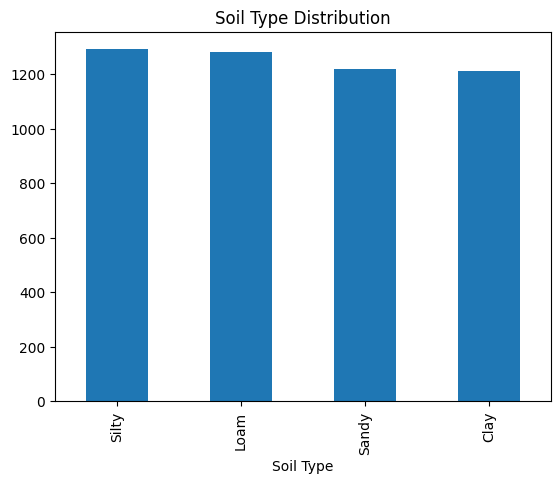

In [206]:
df['Soil Type'].value_counts().plot(kind='bar', title='Soil Type Distribution')

- Insight: The dataset contains four main soil types: Loam, Clay, Silty and Sand. Silty is the most common soil type, followed by Loam.

#### 4.2. Terrain Type Distribution


<Axes: title={'center': 'Terrain Type Distribution'}, xlabel='Terrain Type'>

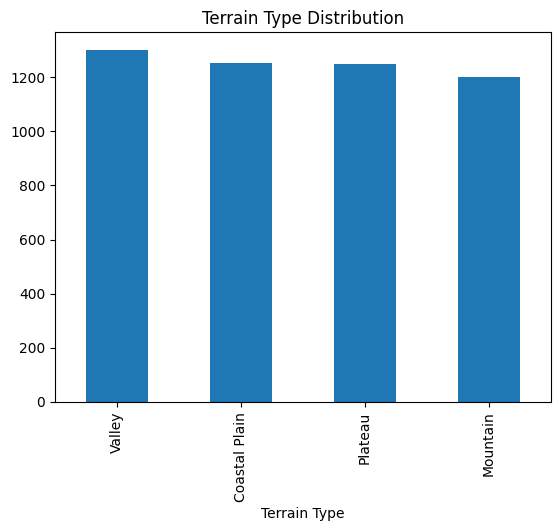

In [207]:
df['Terrain Type'].value_counts().plot(kind='bar', title='Terrain Type Distribution')

- Insight: The terrain types include Valley, Mountain, Plateau and Plain. Valleys are the most common terrain type in the dataset.

#### 4.3. Crop Type Distribution

<Axes: title={'center': 'Crop Type Distribution'}, xlabel='Crop Type'>

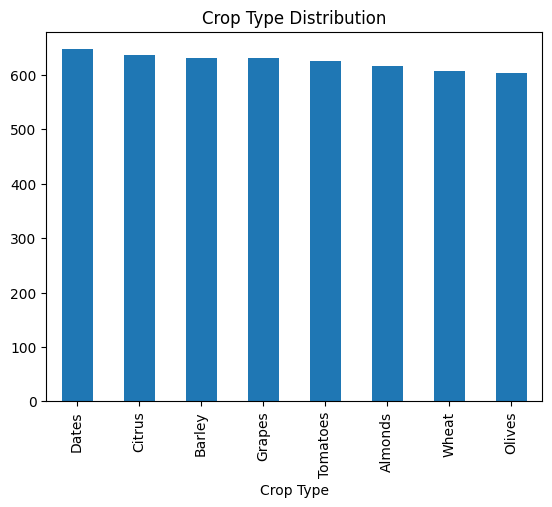

In [208]:
df['Crop Type'].value_counts().plot(kind='bar', title='Crop Type Distribution')

Insight: The dataset includes different types of crops. Dates and Cliturus are the most common crops.

#### 4.4. Irrigation System Type Distribution

<Axes: title={'center': 'Irrigation System Type Distribution'}, xlabel='Irrigation System Type'>

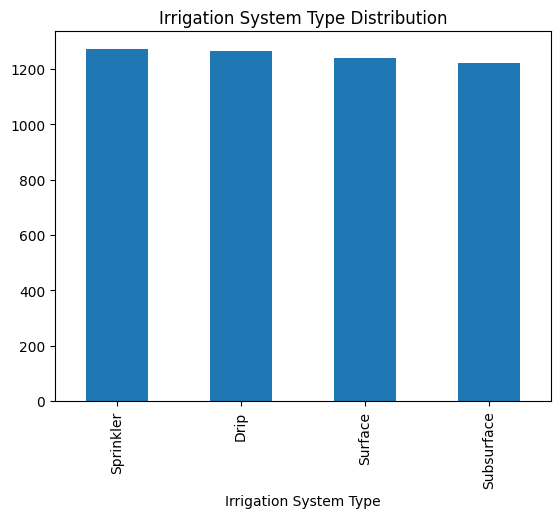

In [209]:
df['Irrigation System Type'].value_counts().plot(kind='bar', title='Irrigation System Type Distribution')

Insight: The most common irrigation systems are Surface, Drip, Subsurface and Sprinkler.

#### 5. Correlation Analysis


Let's explore the relationships between numerical variables using a correlation matrix.



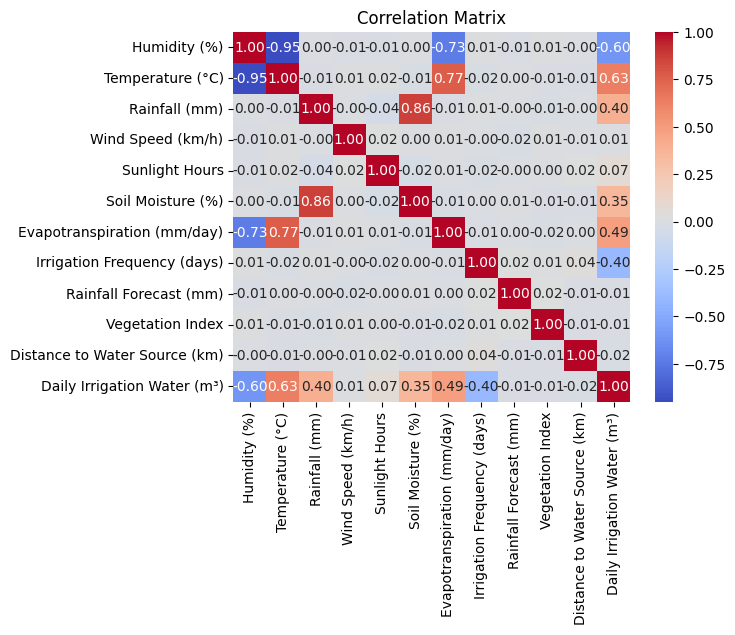

In [210]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- Temperature and Humidity are the most influential factors affecting irrigation needs.
- Other environmental variables have  direct impact on this value.
- This insight helps in refining irrigation models by focusing on the most relevant variables.

### 6. Distribution of Numerical Variables

#### 6.1. Humidity Distribution

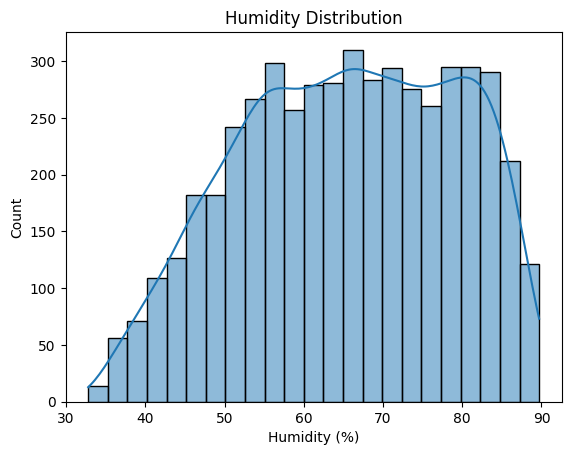

In [211]:
sns.histplot(df['Humidity (%)'], kde=True)
plt.title('Humidity Distribution')
plt.show()

#### 6.2. Temperature Distribution


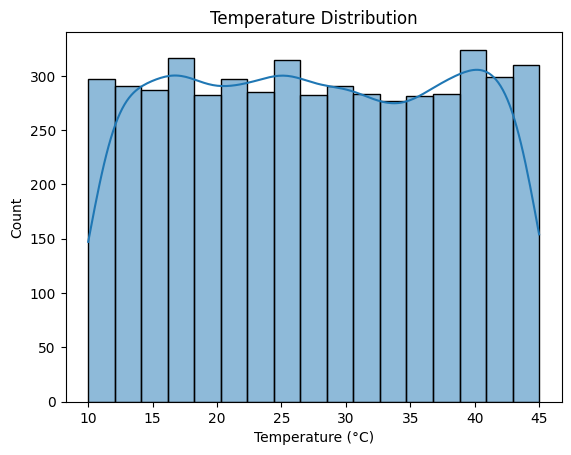

In [212]:
sns.histplot(df['Temperature (°C)'], kde=True)
plt.title('Temperature Distribution')
plt.show()

Temperature values observed are mostly between 10 and 45 Degrees Celsius which can indicate some disgards for cold Regions ! 

#### 6.3. Rainfall Distribution


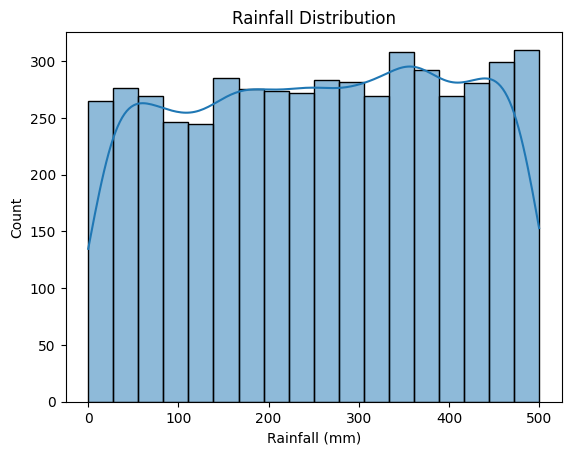

In [213]:
sns.histplot(df['Rainfall (mm)'], kde=True)
plt.title('Rainfall Distribution')
plt.show()

#### 6.4. Soil Moisture Distribution


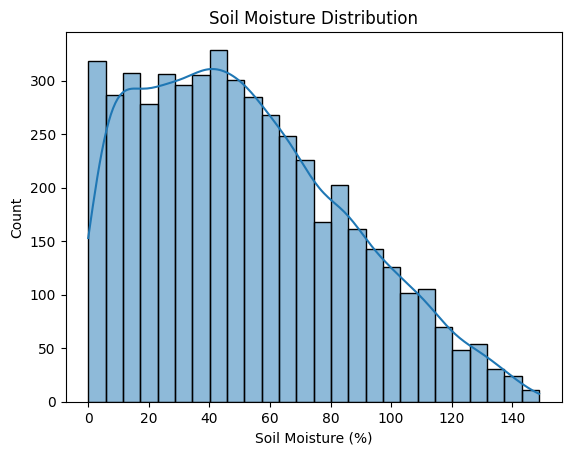

In [214]:
sns.histplot(df['Soil Moisture (%)'], kde=True)
plt.title('Soil Moisture Distribution')
plt.show()

### 7. Relationships Between Variables

#### 7.1. Temperature vs. Evapotranspiration

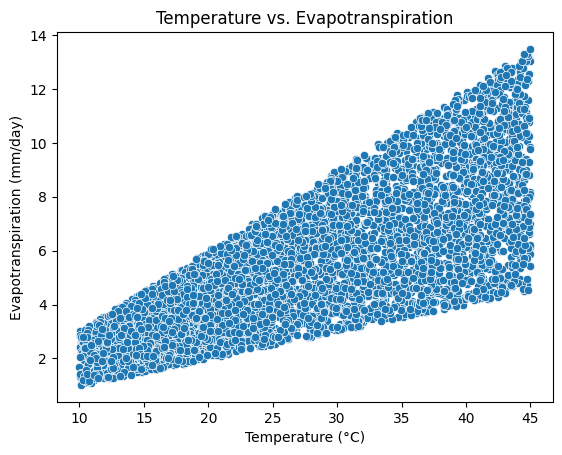

In [215]:
sns.scatterplot(x='Temperature (°C)', y='Evapotranspiration (mm/day)', data=df)
plt.title('Temperature vs. Evapotranspiration')
plt.show()

- Insight: As temperature increases, evapotranspiration tends to increase, indicating a positive relationship . 

#### 7.2. Rainfall vs. Soil Moisture


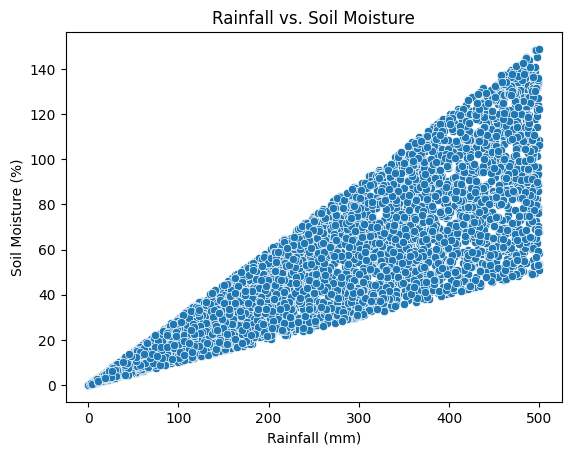

In [216]:
sns.scatterplot(x='Rainfall (mm)', y='Soil Moisture (%)', data=df)
plt.title('Rainfall vs. Soil Moisture')
plt.show()

- Insight: Higher rainfall is associated with higher soil moisture levels.

#### 7.3. Humidity vs. Temperature


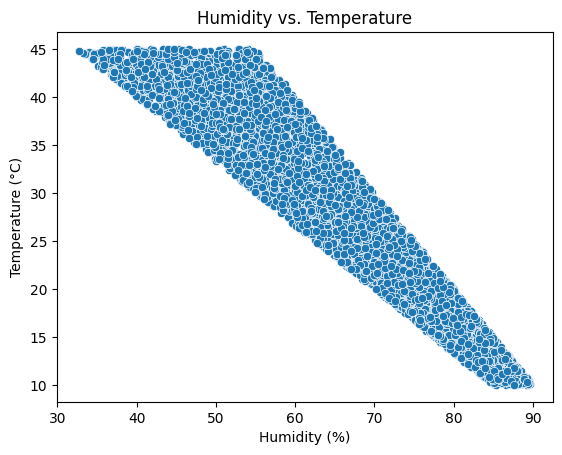

In [217]:
sns.scatterplot(x='Humidity (%)', y='Temperature (°C)', data=df)
plt.title('Humidity vs. Temperature')
plt.show()

- Insight: There is a negative relationship between humidity and temperature, as higher temperatures tend to reduce humidity levels.

### 8. Regional Analysis


#### 8.1. Average Temperature by Region

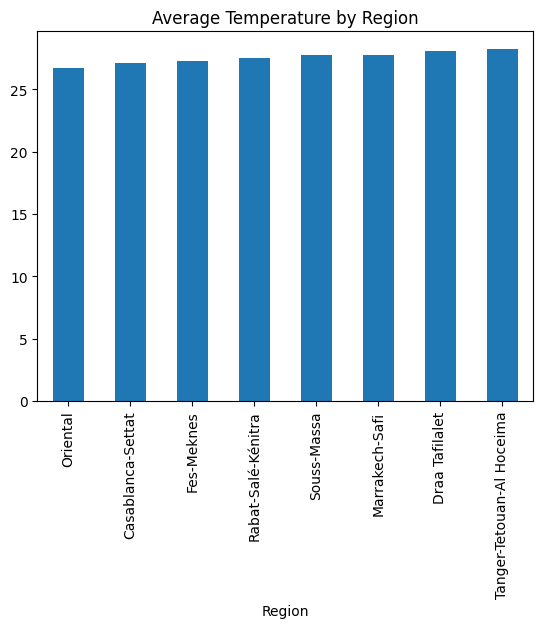

In [218]:
df.groupby('Region')['Temperature (°C)'].mean().sort_values().plot(kind='bar', title='Average Temperature by Region')
plt.show()

#### 8.2. Average Rainfall by Region

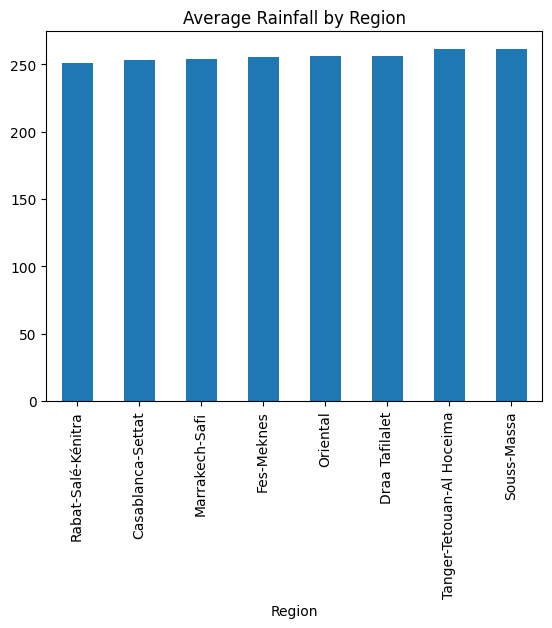

In [219]:
df.groupby('Region')['Rainfall (mm)'].mean().sort_values().plot(kind='bar', title='Average Rainfall by Region')
plt.show()

#### 8.3. Crop Types by Region


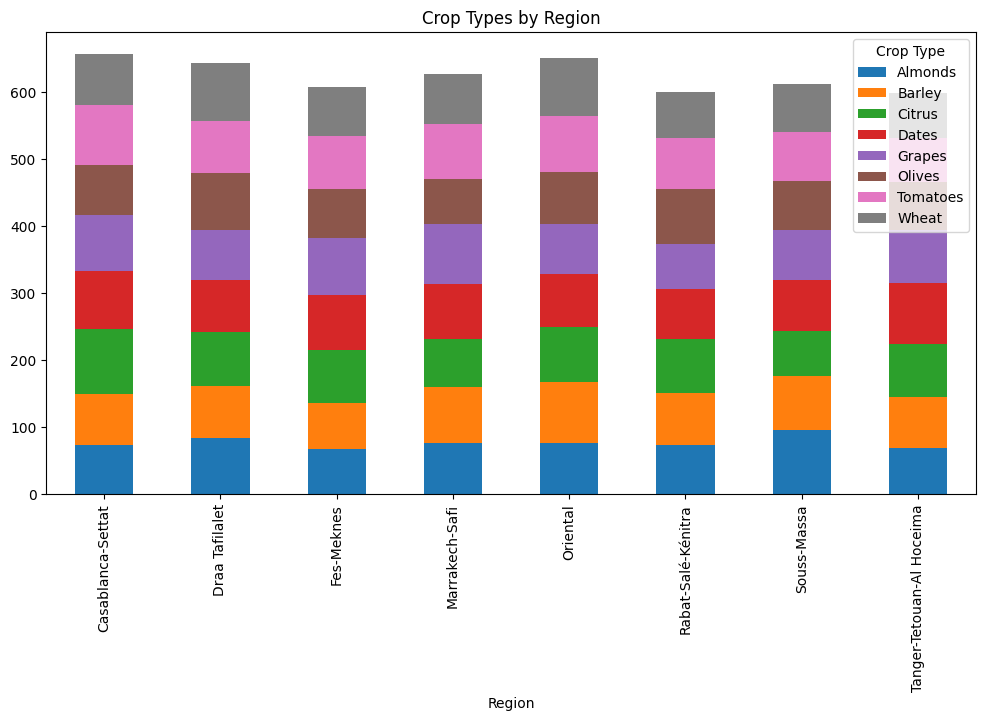

In [220]:
pd.crosstab(df['Region'], df['Crop Type']).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Crop Types by Region')
plt.show()

### 9. Irrigation System Analysis

#### 9.1. Irrigation System vs. Crop Type

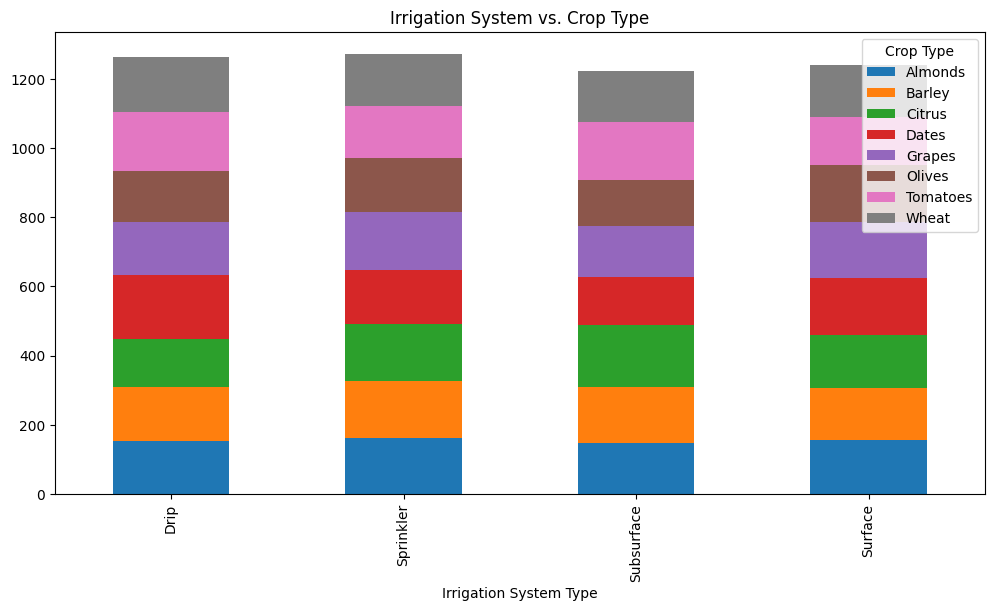

In [221]:
pd.crosstab(df['Irrigation System Type'], df['Crop Type']).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Irrigation System vs. Crop Type')
plt.show()

#### 9.2. Irrigation System vs. Water Availability

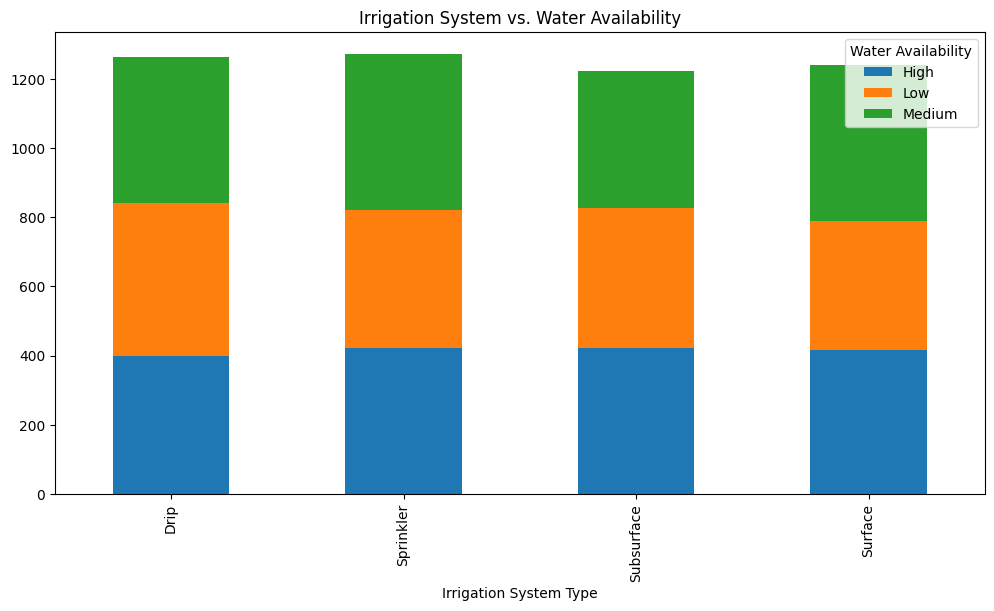

In [222]:
pd.crosstab(df['Irrigation System Type'], df['Water Availability']).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Irrigation System vs. Water Availability')
plt.show()

# Conclusion

This EDA provides a comprehensive overview of the dataset, highlighting key patterns and relationships.